# Exploring the UK's Honey imports and exports

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
%matplotlib inline

In [2]:
LOCATION = "honey.csv"

In [4]:
honey = pd.read_csv(LOCATION, dtype={'Commodity Code':str})
honey.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2015,201505,201505,4,0,0,X,826,United Kingdom,...,NaN,-1,NaN,NaN,169,NaN,1290,NaN,1290.632,0
1,H4,2015,201505,201505,4,0,0,X,826,United Kingdom,...,NaN,-1,NaN,NaN,270,NaN,1522,NaN,1522.760,0
2,H4,2015,201505,201505,4,0,0,X,826,United Kingdom,...,NaN,-1,NaN,NaN,360,NaN,4441,NaN,4441.382,0
3,H4,2015,201505,201505,4,0,0,X,826,United Kingdom,...,NaN,-1,NaN,NaN,501,NaN,5420,NaN,5420.963,0
4,H4,2015,201505,201505,4,0,0,X,826,United Kingdom,...,NaN,-1,NaN,NaN,287,NaN,2715,NaN,2715.898,0


In [5]:
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
COMMODITY = 'Honey'
#headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
honey = honey.reindex(columns=[MONTH, PARTNER, FLOW, COMMODITY, VALUE])
honey.head()

,Period,Partner,Trade Flow,Honey,Trade Value (US$)
0,201505,Cayman Isds,X,NaN,1290
1,201505,Seychelles,X,NaN,1522
2,201505,Ukraine,X,NaN,4441
3,201505,Jordan,X,NaN,5420
4,201505,Iceland,X,NaN,2715


In [6]:
honey = honey[honey[PARTNER] != 'World']
honey.head()


,Period,Partner,Trade Flow,Honey,Trade Value (US$)
0,201505,Cayman Isds,X,NaN,1290
1,201505,Seychelles,X,NaN,1522
2,201505,Ukraine,X,NaN,4441
3,201505,Jordan,X,NaN,5420
4,201505,Iceland,X,NaN,2715


## **Total Trade Flow**

To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?', the dataframe is split into two groups: exports from the UK and imports into the UK. The trade values within each group are summed up to get the total trading.

In [7]:
grouped = honey.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
M    18678554
X     2956269
Name: Trade Value (US$), dtype: int64

Imports are denoted by M

Exports are denoted by X

UK imports exceeds exports by 15722284

## **Main Trade Partners**

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [15]:
imports = honey[honey[FLOW] == 'M']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 28 countries.
The 5 biggest exporters to the UK are:


Partner
New Zealand    5114125
China          4996383
Belgium        1448934
Germany        1307129
Mexico         1210343
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

<AxesSubplot:ylabel='Partner'>

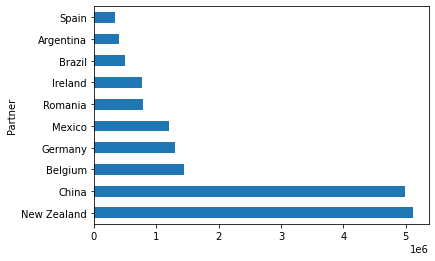

In [16]:
totalImports.head(10).plot(kind='barh')

In [18]:
exports = honey[honey[FLOW] == 'X']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The UK exports to 47 countries.
The 5 biggest importers from the UK are:


Partner
Ireland                 1037040
Poland                   427126
Italy                    206196
United Arab Emirates     202276
France                   145506
Name: Trade Value (US$), dtype: int64

## Bi-directional trade

To address the fourth question, 
'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country. 

In [54]:
countries = pd.pivot_table(honey, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()    

Trade Flow,M,X
Partner,,
Argentina,401113.0,NaN
Australia,279856.0,NaN
Austria,NaN,8518.0
Belgium,1448934.0,8939.0
Brazil,497122.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [55]:
countries.dropna()

Trade Flow,M,X
Partner,,
Belgium,1448934.0,8939.0
China,4996383.0,37363.0
Denmark,30372.0,31000.0
France,240060.0,145506.0
Germany,1307129.0,51099.0
Greece,16999.0,15695.0
Hungary,195786.0,5023.0
India,13559.0,4259.0
Ireland,771262.0,1037040.0


## Regular importers


In [83]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)




In [104]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'Honey')]

,Period,Partner,Trade Flow,Honey,Trade Value (US$)
